<a href="https://colab.research.google.com/github/iamBehzad/Complex-Networks/blob/main/Klemm_Eguilez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Author : Behzad Abbasi - 1401-02-25 


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools as itertools
from matplotlib.colors import LinearSegmentedColormap

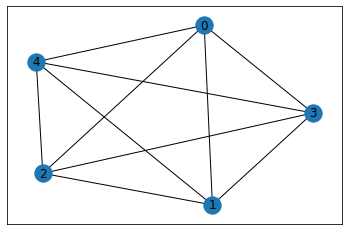

In [ ]:
n=200
m=5
mu=0.3

nodes = range(m)
G=nx.Graph()
G.add_nodes_from(nodes)
edges = itertools.combinations(nodes, 2)
G.add_edges_from(edges)
nx.draw_networkx(G) 

In [ ]:
p=np.zeros((n-1)) # List of Nodes Possiblities
ActiveNodes=np.array(G.nodes)
p_Deactive=np.zeros((m))

for i in range(m, n):
  G.add_node(i)
  r=np.random.random()
  if(r<mu):
    for j in range(0,m):
      #Calculate Possibilities of nodes
      Degrees=[val for (node, val) in G.degree()] 
      SumOfDegrees=np.sum(Degrees[0:i])
      for k in range(0,i):
        p[k]= G.degree(k)/SumOfDegrees
      #y=RouletteWheelSelection(P)
      r = np.random.random()
      c=np.cumsum(p)
      y= np.where(r<=c)[0][0]
      # Avoid creating duplicate edges
      while (G.has_edge(i, y)): 
        r = np.random.random()
        y= np.where(r<=c)[0][0]
      G.add_edge(i,y)
  else:
    for k in ActiveNodes:
      G.add_edge(i,k)
 
  SumOfInverseOfActiveNodesDegrees = sum([1/val for (node, val) in G.degree(ActiveNodes)])
  for a in range(0,m): 
    p_Deactive[a] = (1/G.degree(ActiveNodes[a]))/SumOfInverseOfActiveNodesDegrees
  #y=RouletteWheelSelection(P)
  r = np.random.random()
  c=np.cumsum(p_Deactive)
  y= np.where(r<=c)[0][0]
  ActiveNodes=np.delete (ActiveNodes,y)
  ActiveNodes=np.append (ActiveNodes,i)


Global Clustering Coef is =  0.4370954207730374
Average Shortest Path is =  2.8478391959798994
Number Of Hubs is =  9


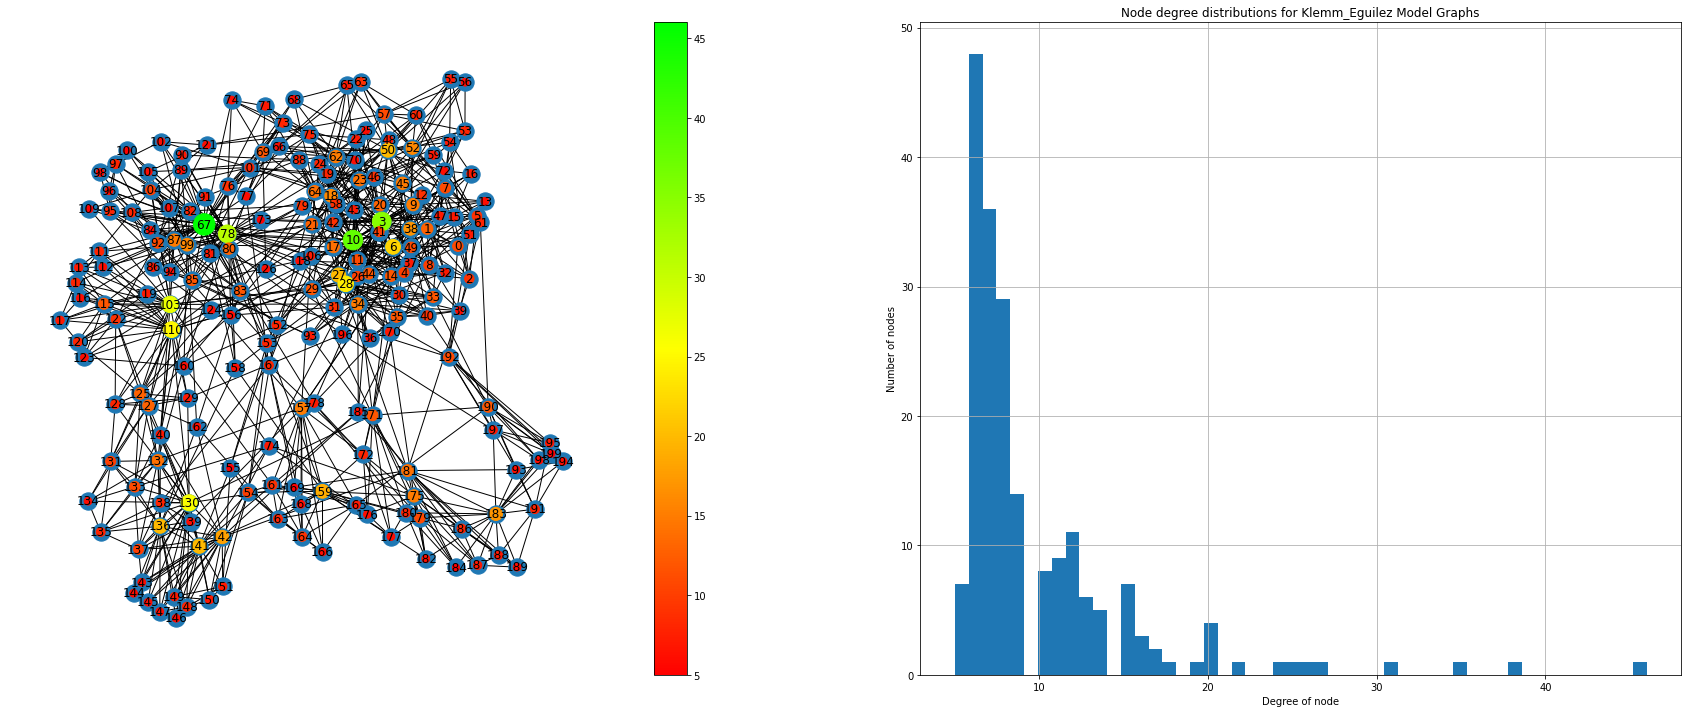

In [ ]:
# create colormap
cdict = {'red':   ((0.0, 1.0, 1.0),
                   (0.5, 1.0, 1.0),
                   (1.0, 0.0, 0.0)),

         'green':  ((0.0, 0.0, 0.0),
                   (0.5, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'blue': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
green_yellow_red = LinearSegmentedColormap('GYR', cdict)

# Degree
node_sizes = [val*10 for (node, val) in G.degree()] 
node_degree = [val for (node, val) in G.degree()] 

plt.figure(i, figsize=(30, 12))
plt.subplot(121)
pos = nx.spring_layout(G)
nx.draw(G, pos , with_labels = True)
P=nx.draw_networkx_nodes(G, pos, node_size = node_sizes, node_color=node_degree,cmap=green_yellow_red)
plt.colorbar(P)

plt.subplot(122)
plt.hist([val for (node, val) in G.degree()] , bins = 50, alpha = 1);
plt.title('Node degree distributions for Klemm_Eguilez Model Graphs');
plt.xlabel('Degree of node')
plt.ylabel('Number of nodes')
plt.grid()

data = list(nx.clustering(G). items())
print('Global Clustering Coef is = ' , np.mean(np.array(data)[:,1]))
print('Average Shortest Path is = ' ,   nx.average_shortest_path_length(G))
node_degree = [val for (node, val) in G.degree()] 
print('Number Of Hubs is = ' , sum( x>20 for x in node_degree))